<a href="https://colab.research.google.com/github/kilos11/Data_Science/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prediction

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Import necessary libraries for data manipulation, visualization, and deep learning

# Import the NumPy library for array manipulation and mathematical operations

# Import the Matplotlib library for creating plots and visualizations

# Import the Pandas library for data manipulation and analysis

# Import the datetime module for working with date and time data

# Import the MinMaxScaler class from the scikit-learn library for feature scaling

# Import the Sequential class from the Keras library for creating a sequential model

# Import the Dense class from the Keras library for creating fully connected layers

# Import the LSTM class from the Keras library for creating LSTM layers

# Import the Dropout class from the Keras library for regularization in deep learning models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DS_and_ML_projects-master/Stock Prediction/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:

dataset.isna().any()
# Check for missing values in the dataset

# The `isna()` function returns a boolean DataFrame indicating which elements in the dataset are NaN (missing values)
# The `any()` function is then called on the boolean DataFrame to check if there are any missing values in each column
# The result will be a Series object that shows whether each column contains any missing values (True) or not (False)

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<Axes: xlabel='Date'>

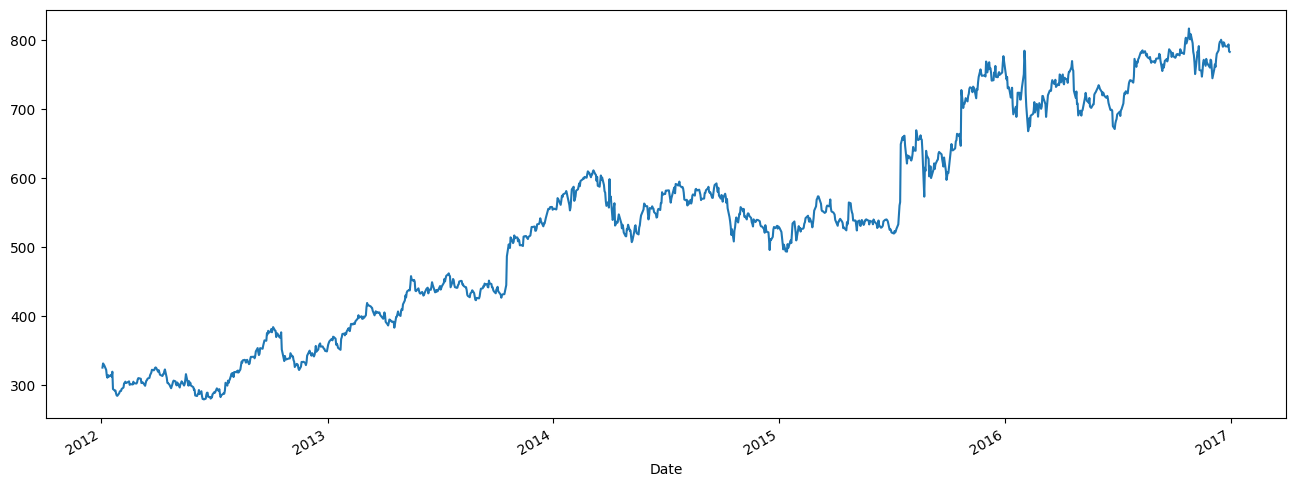

In [ ]:

dataset['Open'].plot(figsize=(16,6))
# Plot the 'Open' column of the dataset

# The code above assumes that the variable 'dataset' is a pandas DataFrame or Series object
# The 'Open' column is accessed using the syntax dataset['Open']
# The 'plot()' function is then called on the 'Open' column to create a line plot
# The 'figsize=(16,6)' parameter sets the size of the plot to 16 inches in width and 6 inches in height

In [ ]:

dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)
# Remove commas and convert the 'Close' column to float


# The square brackets notation, dataset["Close"], is used to access the 'Close' column of the dataset
# The str.replace(',', '') function is called on the 'Close' column to remove any commas in the values
# The astype(float) function is then used to convert the cleaned values to float data type
# The result is assigned back to the 'Close' column of the dataset

In [ ]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [ ]:

dataset.rolling(7).mean().head(20)
# Calculate the rolling mean with a window size of 7 and display the first 20 rows

# The 'rolling()' function is called on the dataset, specifying a window size of 7
# The rolling mean is calculated by taking the mean of each window of 7 consecutive values
# The 'head(20)' function is then used to display the first 20 rows of the resulting rolling mean values
# This operation is useful for smoothing out fluctuations and identifying long-term trends in the data

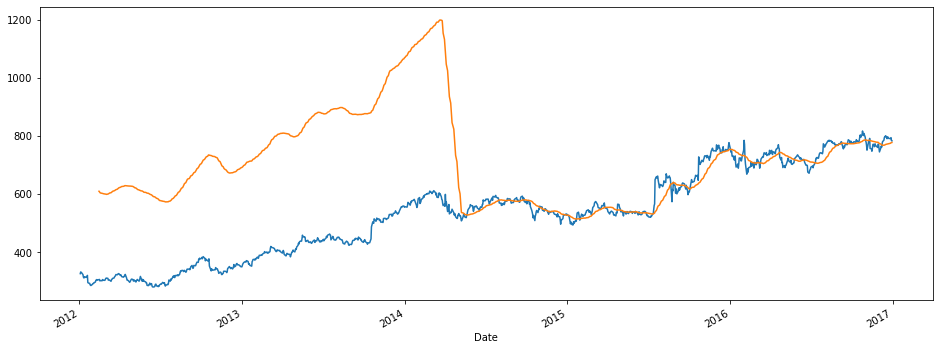

In [ ]:

dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()
# Plot the 'Open' column and the rolling mean of the 'Close' column

# The first line plots the 'Open' column of the dataset with a figure size of (16,6)
# The second line calculates the rolling mean of the 'Close' column with a window size of 30
# The rolling mean is then plotted on the same figure as the 'Open' column

# The first plot shows the historical values of the 'Open' column over time
# The second plot shows the rolling mean of the 'Close' column, representing a smoothed version of the closing prices

# This code allows for visualizing the trends and patterns in the 'Open' column and the rolling mean of the 'Close' column

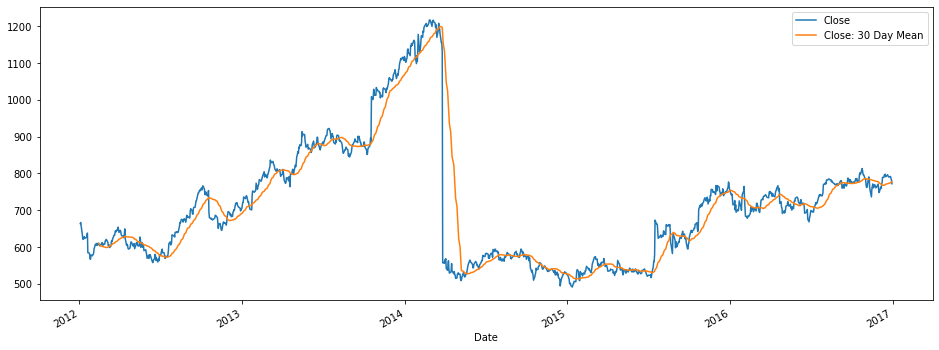

In [ ]:

dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
# Calculate the 30-day rolling mean of the 'Close' column and plot it with the original 'Close' column

# The first line calculates the 30-day rolling mean of the 'Close' column using the 'rolling()' and 'mean()' functions
# The result is stored in a new column called 'Close: 30 Day Mean'

# The second line creates a new DataFrame containing the 'Close' column and the 'Close: 30 Day Mean' column
# The two columns are then plotted together using the 'plot()' function, with a figure size of (16,6)

# This code allows for visualizing the original 'Close' column and its 30-day rolling mean on the same plot
# It helps in understanding the trend and smoothing out short-term fluctuations in the closing prices

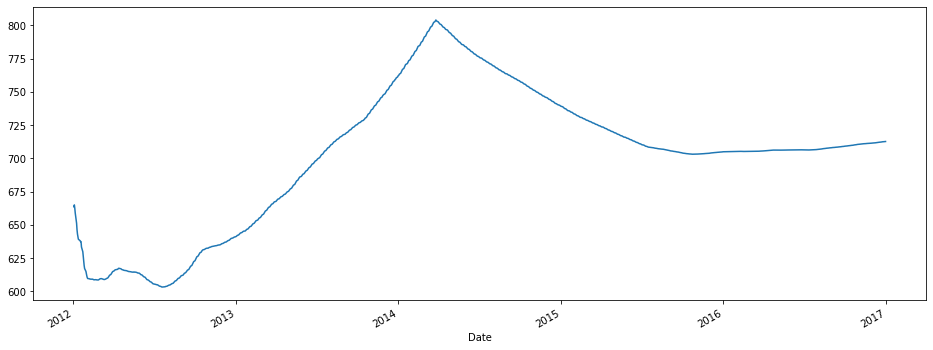

In [ ]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:

training_set = dataset['Open']
training_set = pd.DataFrame(training_set)
# The first line selects only the 'Open' column from the dataset and assigns it to the variable 'training_set'
# The second line converts the 'training_set' variable into a new DataFrame using the 'pd.DataFrame()' function

# This code creates a new DataFrame called 'training_set' that contains only the 'Open' column from the original dataset
# The 'training_set' DataFrame can then be used for further analysis or modeling purposes

In [ ]:

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Scale the training set using Min-Max scaling


# The first line creates an instance of the MinMaxScaler from the scikit-learn library
# The feature_range parameter is set to (0, 1), which scales the data between 0 and 1

# The second line applies the fit_transform() method of the scaler to the 'training_set'
# This method computes the minimum and maximum values of the 'training_set' and scales the data accordingly

# The 'training_set_scaled' variable will contain the scaled values of the 'training_set'
# Min-Max scaling is commonly used to normalize data between a specified range, making it suitable for many machine learning algorithms

In [ ]:

X_train = []
y_train = []

# Creating input sequences and corresponding labels for training
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the input sequences for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()

In [ ]:

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:

regressor.compile(optimizer='adam', loss='mean_squared_error')
# Compile the LSTM model

# The code above sets the optimizer and loss function for the LSTM model
# 'adam' is chosen as the optimizer, which is a popular choice for gradient-based optimization algorithms
# 'mean_squared_error' is chosen as the loss function, which is commonly used for regression problems

regressor.fit(X_train, y_train, epochs=100, batch_size=32)
# Train the LSTM model

# The code above trains the LSTM model using the training data
# X_train is the input data and y_train is the corresponding target/label data
# The 'epochs' parameter specifies the number of times the training process is repeated
# The 'batch_size' parameter determines the number of samples used in each iteration of the training process
# The model is trained by minimizing the loss function using the specified optimizer and updating the model's weights

Epoch 1/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0388
Epoch 2/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0046
Epoch 5/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0046
Epoch 13/100
38/38 [====

38/38 [==============================] - 3s 67ms/step - loss: 0.0014


In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [ ]:

dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
# Concatenate the 'Open' column of the training and test datasets vertically

# The code above combines the 'Open' column of the original dataset and the test dataset
# This is done to ensure that the input sequence for prediction includes the relevant previous data for accurate predictions

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# Select the input data for prediction

# The code above selects the input data for prediction
# It takes the last 60 days' worth of data from the concatenated dataset
# The length of the concatenated dataset minus the length of the test dataset gives the starting index

inputs = inputs.reshape(-1, 1)
# Reshape the input data

# The code above reshapes the input data to a 2D array with one column
# This is necessary to match the input shape expected by the LSTM model

inputs = sc.transform(inputs)
# Scale the input data using the same scaler used during training

# The code above scales the input data using the same scaler object used during training
# This ensures consistency in scaling between the training and prediction phases

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
# Create the input sequences for prediction

# The code above creates the input sequences for prediction
# It iterates from index 60 to 79 to create 20 input sequences of length 60
# Each input sequence is extracted from the scaled input data

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Reshape and format the input sequences for prediction

# The code above reshapes and formats the input sequences for prediction
# It converts the list of input sequences into a 3D NumPy array
# The shape of the array is adjusted to match the input shape expected by the LSTM model

predicted_stock_price = regressor.predict(X_test)
# Perform the prediction using the LSTM model

# The code above uses the trained LSTM model to predict the stock prices based on the input sequences

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Inverse transform the predicted prices to the original scale

# The code above reverses the scaling applied to the predicted prices
# This brings the predicted prices back to their original scale

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


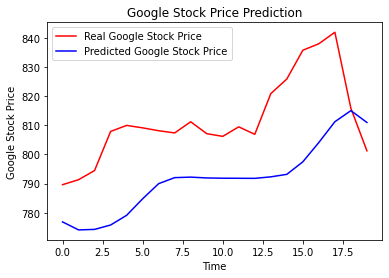

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

plt.show()
